In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
L_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')                       #Training datasets

In [3]:
L_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')                         #test datasets

In [4]:
L_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [53]:
L_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
Loan = pd.concat([L_train, L_test], axis = 0)

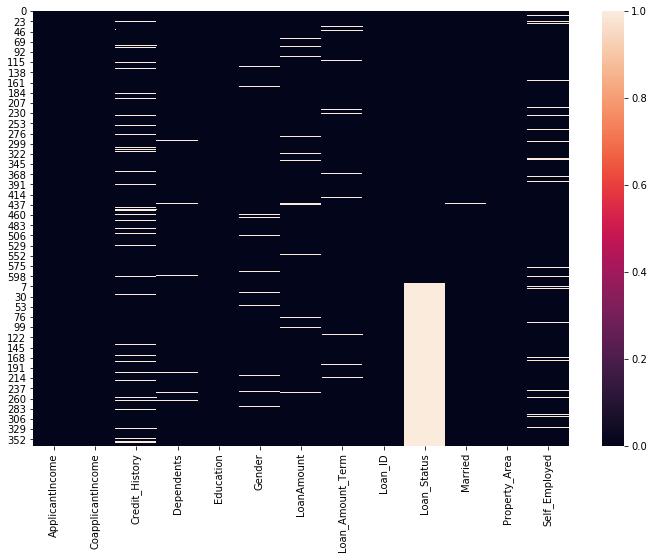

In [6]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(Loan.isnull())                                           #NULL VALUES in column

In [7]:
n = Loan[0:614].apply(lambda x: sum(x.isnull()),axis=0) #number of null values in training data set

In [8]:
n

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Dependents           15
Education             0
Gender               13
LoanAmount           22
Loan_Amount_Term     14
Loan_ID               0
Loan_Status           0
Married               3
Property_Area         0
Self_Employed        32
dtype: int64

In [9]:
t = Loan[614: ].apply(lambda x: sum(x.isnull()),axis=0)

In [10]:
t                    # number of null values in test data

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount             5
Loan_Amount_Term       6
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
dtype: int64

In [11]:
Loan.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [12]:
Loan['Credit_History'].isnull().value_counts()

False    902
True      79
Name: Credit_History, dtype: int64

In [13]:
Loan['Credit_History'] = Loan['Credit_History'].fillna(1.0)

In [14]:
Loan['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [15]:
Loan.loc[Loan['Dependents'] == '3+' , 'Dependents'] = 3
Loan['Dependents'] = Loan['Dependents'].fillna(0)

In [16]:
Loan['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [17]:
Loan['Gender'] = Loan['Gender'].fillna('Male')

In [18]:
Loan['Gender'].value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [21]:
Loan['LoanAmount'].isnull().value_counts()

False    954
True      27
Name: LoanAmount, dtype: int64

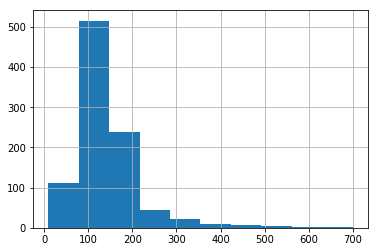

In [22]:
Loan['LoanAmount'].hist()

In [29]:
Loan['LoanAmount_log']= np.log(Loan['LoanAmount'])

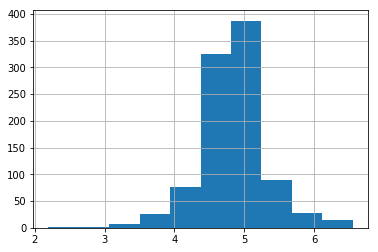

In [30]:
Loan['LoanAmount_log'].hist()

In [34]:
Loan['LoanAmount_log'].mean()

4.845892345452485

In [35]:
Loan['LoanAmount_log'] = Loan['LoanAmount_log'].fillna(Loan['LoanAmount_log'].mean())

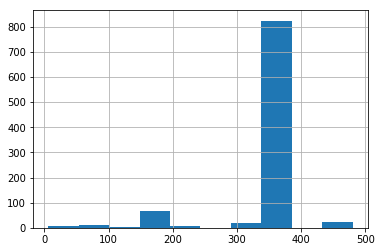

In [38]:
Loan['Loan_Amount_Term'].hist()

In [43]:
Loan['Loan_Amount_Term'] = Loan['Loan_Amount_Term'].fillna(360.0)

In [45]:
Loan['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [46]:
Loan['Married'] = Loan['Married'].fillna('Yes')

In [48]:
Loan['Property_Area'].isnull().value_counts()

False    981
Name: Property_Area, dtype: int64

In [52]:
Loan['Self_Employed'].isnull().value_counts()

False    926
True      55
Name: Self_Employed, dtype: int64

In [53]:
Loan['Self_Employed'] = Loan['Self_Employed'].fillna('No')

In [58]:
Loan['ApplicantIncome'].isnull().value_counts()

False    981
Name: ApplicantIncome, dtype: int64

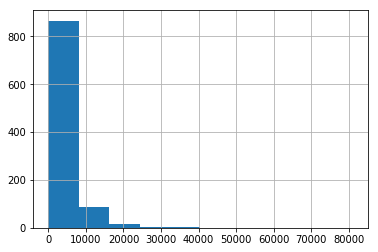

In [59]:
Loan['ApplicantIncome'].hist()

In [62]:
Loan['CoapplicantIncome'].isnull().value_counts()

False    981
Name: CoapplicantIncome, dtype: int64

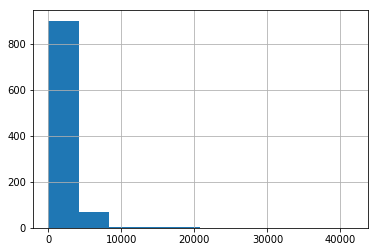

In [63]:
Loan['CoapplicantIncome'].hist()

In [64]:
Loan['Totalincome'] = Loan['CoapplicantIncome'] + Loan['ApplicantIncome']

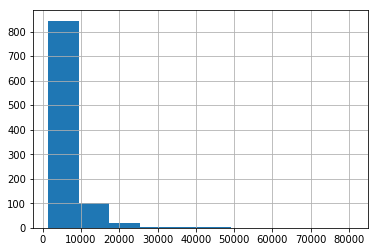

In [66]:
Loan['Totalincome'].hist()

In [69]:
Loan['Totalincome_log'] = np.log(Loan['Totalincome'])

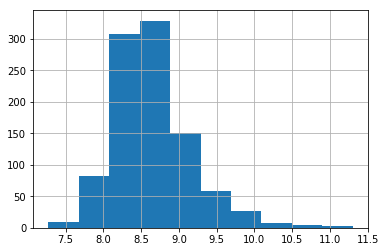

In [70]:
Loan['Totalincome_log'].hist()

In [71]:
Loan.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,LoanAmount_log,Totalincome,Totalincome_log
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,4.845892,5849.0,8.674026
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,4.852030,6091.0,8.714568
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,4.189655,3000.0,8.006368
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,4.787492,4941.0,8.505323
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,4.948760,6000.0,8.699515


In [74]:
Loan = Loan.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Totalincome'],axis=1)

In [75]:
Loan.head()

,Credit_History,Dependents,Education,Gender,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,LoanAmount_log,Totalincome_log
0,1.0,0,Graduate,Male,360.0,LP001002,Y,No,Urban,No,4.845892,8.674026
1,1.0,1,Graduate,Male,360.0,LP001003,N,Yes,Rural,No,4.852030,8.714568
2,1.0,0,Graduate,Male,360.0,LP001005,Y,Yes,Urban,Yes,4.189655,8.006368
3,1.0,0,Not Graduate,Male,360.0,LP001006,Y,Yes,Urban,No,4.787492,8.505323
4,1.0,0,Graduate,Male,360.0,LP001008,Y,No,Urban,No,4.948760,8.699515


In [77]:
##dummies variable for all of the object features

sex = pd.get_dummies(Loan['Gender'],drop_first = True,)
married = pd.get_dummies(Loan['Married'], drop_first = True,prefix= 'Married_')
education = pd.get_dummies(Loan['Education'], drop_first = True)
employed = pd.get_dummies(Loan['Self_Employed'], drop_first = True, prefix= 'employed_')
area = pd.get_dummies(Loan['Property_Area'], drop_first = True)
loan_status = pd.get_dummies(Loan['Loan_Status'], drop_first= True, prefix='loan_status_')

In [78]:
Loan = pd.concat([Loan, sex, married, education, employed, area, loan_status], axis = 1)

In [79]:
Loan.head()

,Credit_History,Dependents,Education,Gender,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,LoanAmount_log,Totalincome_log,Male,Married__Yes,Not Graduate,employed__Yes,Semiurban,Urban,loan_status__Y
0,1.0,0,Graduate,Male,360.0,LP001002,Y,No,Urban,No,4.845892,8.674026,1,0,0,0,0,1,1
1,1.0,1,Graduate,Male,360.0,LP001003,N,Yes,Rural,No,4.852030,8.714568,1,1,0,0,0,0,0
2,1.0,0,Graduate,Male,360.0,LP001005,Y,Yes,Urban,Yes,4.189655,8.006368,1,1,0,1,0,1,1
3,1.0,0,Not Graduate,Male,360.0,LP001006,Y,Yes,Urban,No,4.787492,8.505323,1,1,1,0,0,1,1
4,1.0,0,Graduate,Male,360.0,LP001008,Y,No,Urban,No,4.948760,8.699515,1,0,0,0,0,1,1


In [81]:
Loan = Loan.drop(['Education','Gender','Loan_Status','Married','Property_Area','Self_Employed'],axis=1)

In [82]:
Loan.head()

,Credit_History,Dependents,Loan_Amount_Term,Loan_ID,LoanAmount_log,Totalincome_log,Male,Married__Yes,Not Graduate,employed__Yes,Semiurban,Urban,loan_status__Y
0,1.0,0,360.0,LP001002,4.845892,8.674026,1,0,0,0,0,1,1
1,1.0,1,360.0,LP001003,4.852030,8.714568,1,1,0,0,0,0,0
2,1.0,0,360.0,LP001005,4.189655,8.006368,1,1,0,1,0,1,1
3,1.0,0,360.0,LP001006,4.787492,8.505323,1,1,1,0,0,1,1
4,1.0,0,360.0,LP001008,4.948760,8.699515,1,0,0,0,0,1,1


In [119]:
X = Loan[0:614]

In [125]:
X_test = Loan[614:]

In [120]:
X.head()

,Credit_History,Dependents,Loan_Amount_Term,Loan_ID,LoanAmount_log,Totalincome_log,Male,Married__Yes,Not Graduate,employed__Yes,Semiurban,Urban,loan_status__Y
0,1.0,0,360.0,LP001002,4.845892,8.674026,1,0,0,0,0,1,1
1,1.0,1,360.0,LP001003,4.852030,8.714568,1,1,0,0,0,0,0
2,1.0,0,360.0,LP001005,4.189655,8.006368,1,1,0,1,0,1,1
3,1.0,0,360.0,LP001006,4.787492,8.505323,1,1,1,0,0,1,1
4,1.0,0,360.0,LP001008,4.948760,8.699515,1,0,0,0,0,1,1


In [122]:
X_train = X.drop(['Loan_ID','loan_status__Y'],axis=1)             #training data

In [123]:
y = X['loan_status__Y']                                           #dependent variable

In [126]:
X_test = X_test.drop(['Loan_ID','loan_status__Y'],axis=1)         #test data

In [127]:
X_test.head()

,Credit_History,Dependents,Loan_Amount_Term,LoanAmount_log,Totalincome_log,Male,Married__Yes,Not Graduate,employed__Yes,Semiurban,Urban
0,1.0,0,360.0,4.700480,8.651724,1,1,0,0,0,1
1,1.0,1,360.0,4.836282,8.428581,1,1,0,0,0,1
2,1.0,2,360.0,5.337538,8.824678,1,1,0,0,0,1
3,1.0,2,360.0,4.605170,8.494129,1,1,0,0,0,1
4,1.0,0,360.0,4.356709,8.094378,1,0,1,0,0,1


In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [129]:
X_train = sc.fit_transform(X_train)


In [130]:
X_test = sc.transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
parameters = {
    'n_estimators': [50,100,200,300,500],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [134]:
grid_search = GridSearchCV(estimator= rfc, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

In [135]:
grid_search= grid_search.fit(X_train, y)

In [136]:
best_accuracy = grid_search.best_score_
best_accuracy

0.79641693811074921

In [137]:
best_parameter = grid_search.best_params_
best_parameter

{'max_features': 'log2', 'n_estimators': 200}

In [138]:
pred = grid_search.predict(X_test)

In [148]:
lp = pd.DataFrame(pred, columns=['Loan_Status']) 

In [149]:
ld = Loan['Loan_ID'][614:]

In [150]:
submit = pd.concat([ld, lp], axis=1)

In [152]:
submit.loc[submit['Loan_Status'] == 1 , 'Loan_Status'] = 'Y'
submit.loc[submit['Loan_Status'] == 0 , 'Loan_Status'] = 'N'

In [153]:
submit.to_csv('solution2.csv')